# Setup and Load Data

## Install dependencies and setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\MSI GL\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\MSI GL\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\MSI GL\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^

In [2]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 2.1.0
astunparse              1.6.3
certifi                 2024.2.2
charset-normalizer      3.3.2
colorama                0.4.6
contourpy               1.2.1
cycler                  0.12.1
flatbuffers             24.3.25
fonttools               4.51.0
gast                    0.5.4
google-pasta            0.2.0
grpcio                  1.62.2
h5py                    3.11.0
idna                    3.7
joblib                  1.4.0
keras                   3.3.2
kiwisolver              1.4.5
libclang                18.1.1
Markdown                3.6
markdown-it-py          3.0.0
MarkupSafe              2.1.5
matplotlib              3.8.4
mdurl                   0.1.2
ml-dtypes               0.3.2
namex                   0.0.8
numpy                   1.26.4
opencv-python           4.9.0.80
opt-einsum              3.3.0
optree                  0.11.0
packaging               24.0
pillow                


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Remove Dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data'

In [6]:
os.listdir(data_dir)

['happy', 'sad']

In [7]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1-2.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_257759165_m9yldegJvu8gPi8lOHDM0mwP8LejhmKK.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '106701784-1600112459978-gettyimages-1210809980-3q4a2717.jpeg',
 '1687d86811a2c25b877448ed47218131.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '35438_hd.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '383627315.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '71hBPTAhIXL._AC_UF10001000_QL80_.jpg',
 '960x0.jpg',
 'aa-happy-people.jpg',
 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Senio

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
image_exts[2]

'bmp'

In [10]:
img = cv2.imread(os.path.join('data', 'happy', 'Couple_Happy_money_062618.jpg'))
img

array([[[244, 231, 215],
        [244, 231, 215],
        [246, 233, 219],
        ...,
        [234, 209, 183],
        [235, 210, 184],
        [236, 211, 185]],

       [[244, 231, 215],
        [244, 231, 215],
        [245, 232, 216],
        ...,
        [234, 209, 183],
        [235, 210, 184],
        [235, 210, 184]],

       [[244, 231, 215],
        [244, 231, 215],
        [244, 231, 215],
        ...,
        [235, 209, 185],
        [235, 209, 185],
        [234, 208, 184]],

       ...,

       [[  1,  59,  81],
        [ 10,  37,  57],
        [  5,  12,  21],
        ...,
        [  0,   1,   1],
        [  7,  10,  18],
        [  0,   0,  12]],

       [[  0,   5,  16],
        [  0,   0,  12],
        [  2,  10,  23],
        ...,
        [  7,  32,  48],
        [  0,   0,  11],
        [  0,   1,   1]],

       [[  2,   4,  14],
        [  0,   2,  16],
        [  1,  10,  24],
        ...,
        [ 28, 110, 145],
        [  0,  12,  40],
        [  7,  48,  43]]

In [11]:
type(img)

numpy.ndarray

In [12]:
img.shape

(900, 1600, 3)

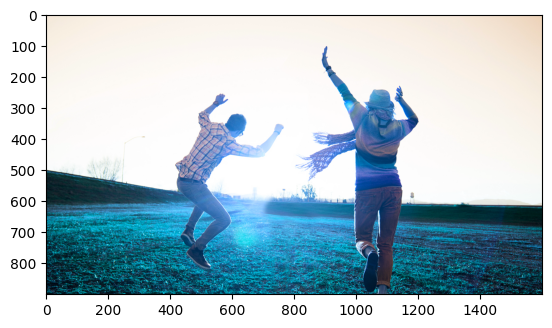

In [13]:
plt.imshow(img)

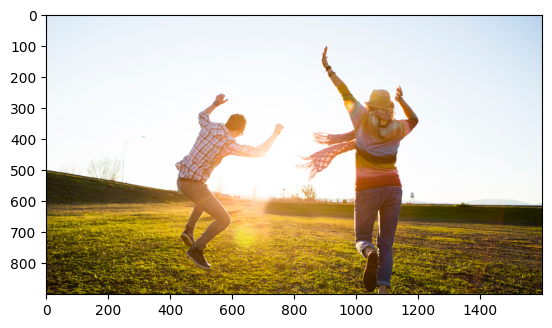

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
                print('Issue with image {}'.format(image_path))

## 1.3 Load Data

Tensorflow dataset API when building a deep learning model. It allows to build a data pipeline rather than loading each data to the memory. 

In [16]:
tf.data.Dataset??
# double ?? will give you documentation
# tf.data.Dataset.list_files

In [17]:
tf.keras.utils.image_dataset_from_directory??

In [18]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 177 files belonging to 2 classes.


In [19]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
# data[0] # Cannot access data like this

In [22]:
data_iterator = data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001F4D3A12AD0>)

In [23]:
batch = data_iterator.next()

In [24]:
batch[0]

array([[[[244.      , 254.      , 254.09375 ],
         [245.64062 , 255.      , 253.28125 ],
         [247.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        [[244.88785 , 254.88785 , 254.54688 ],
         [245.9263  , 255.      , 253.56693 ],
         [247.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        [[245.      , 255.      , 254.54688 ],
         [246.64062 , 255.      , 254.28125 ],
         [247.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        ...,

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]

In [26]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [31]:
batch[1]

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0])